# Capstone Project

### Data Overview
(WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

[Fake News Classification on WELFake Dataset ](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification/code).

## <centre> EDA

In [3]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer





In [4]:
df = pd.read_csv('WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [5]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


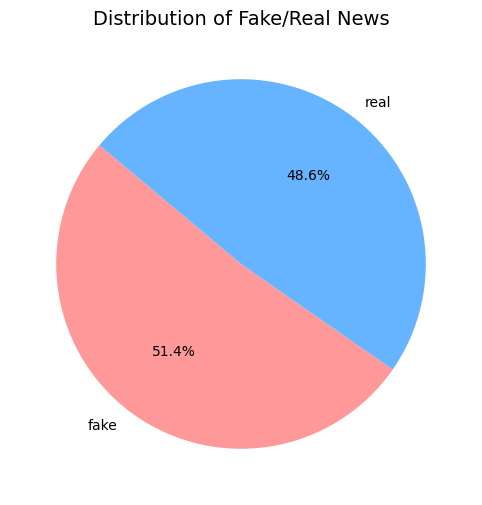

In [7]:
# Define class names and get label counts
class_names = ['fake', 'real']
label_count = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_count, labels=class_names, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Fake/Real News', fontsize=14)
plt.show()

In [8]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [9]:
df.dropna(subset=['title', 'text'], inplace=True)

In [10]:
df.drop_duplicates()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0


In [11]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
df.nunique()

title    62308
text     62200
label        2
dtype: int64

In [13]:
df['content'] = df['title'] + " " + df['text']

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(content):
    text = content.lower()
    
    # Expand contractions (e.g., "isn't" -> "is not")
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'m", " am", text)
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    
    # Tokenize and remove stopwords, apply lemmatization
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Rejoin tokens into a single string
    text = ' '.join(tokens)
    
    return text

# Apply preprocessing
df['content'] = df['content'].apply(preprocess_text)


In [15]:
df["body_len"] = df["content"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,content,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement high alert following threat co...,2709
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable obama attorney general say charlo...,233
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,bobby jindal raised hindu us story christian c...,4770
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan russia unvelis image terrifying new supe...,1178
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,time christian group sue amazon splc designati...,982


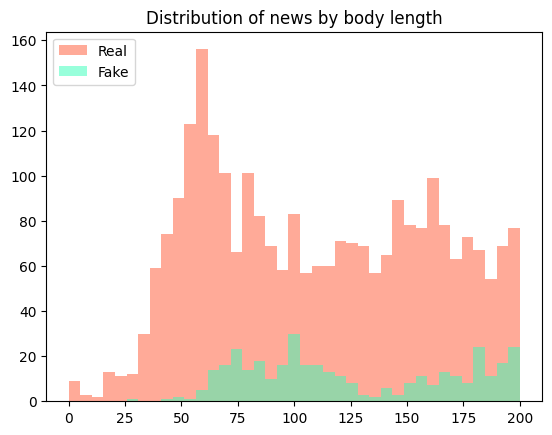

In [16]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Real", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Fake", color="#33FFB8")
plt.legend(loc="upper left")
plt.title("Distribution of news by body length")
plt.show()

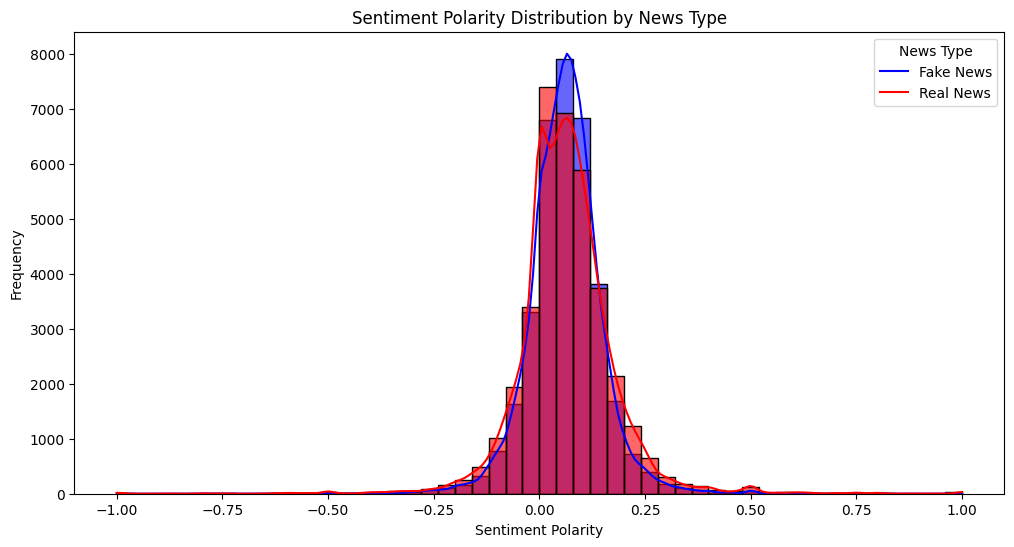

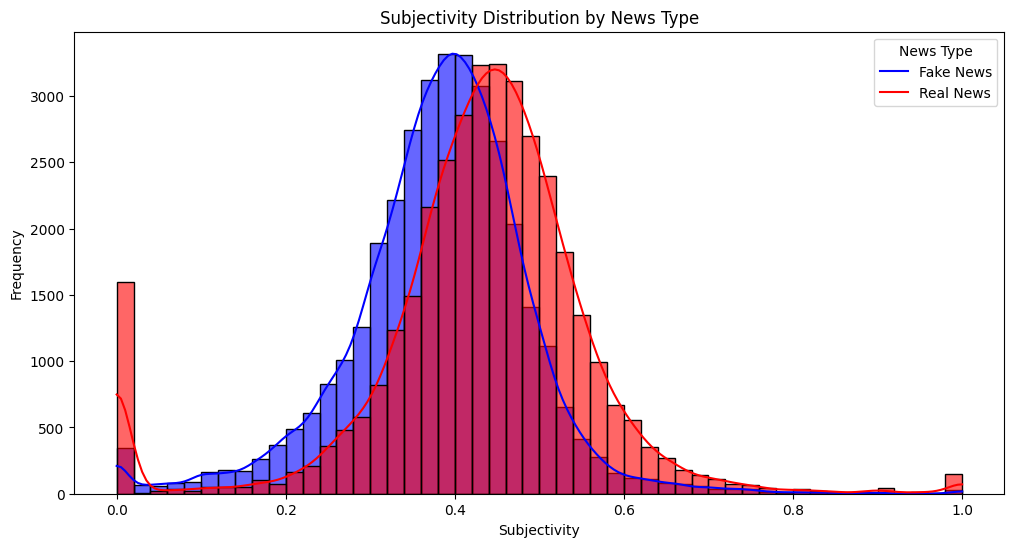

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Define functions to calculate sentiment polarity and subjectivity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Apply sentiment and subjectivity analysis
df['sentiment'] = df['text'].apply(lambda x: get_sentiment(str(x)))
df['subjectivity'] = df['text'].apply(lambda x: subjectivity(str(x)))
df['news_type'] = df['label'].map({0: 'Fake', 1: 'Real'})  # Map label to descriptive text

# Visualize Sentiment Distribution with Overlayed Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df, x='sentiment', hue='news_type', bins=50, kde=True, palette=['red', 'blue'], alpha=0.6)
plt.title('Sentiment Polarity Distribution by News Type')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend(title='News Type', labels=['Fake News', 'Real News'], loc='upper right')  # Specify labels for clarity
plt.show()



# Visualize Subjectivity Distribution with Overlayed Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df, x='subjectivity', hue='news_type', bins=50, kde=True, palette=['red', 'blue'], alpha=0.6)
plt.title('Subjectivity Distribution by News Type')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.legend(title='News Type', labels=['Fake News', 'Real News'], loc='upper right')  # Specify labels for clarity
plt.show()


/var/folders/88/8c2dgq99663bpg_bf9dqpb0r0000gn/T/ipykernel_29596/3621444264.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['word_count'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)


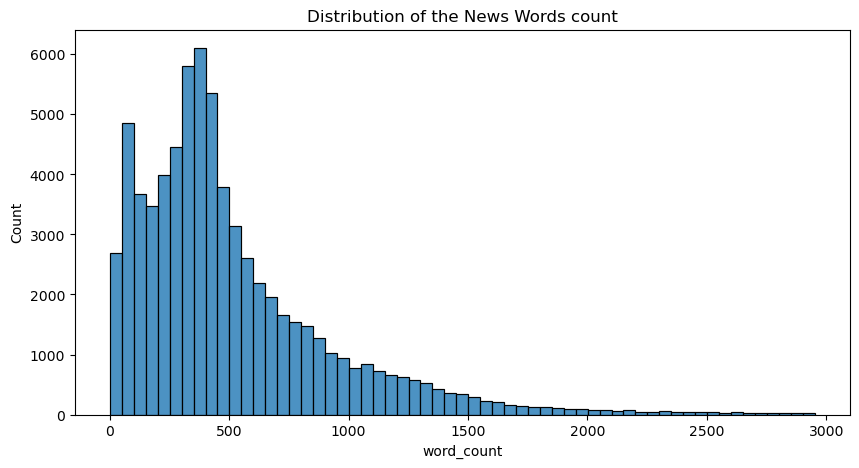

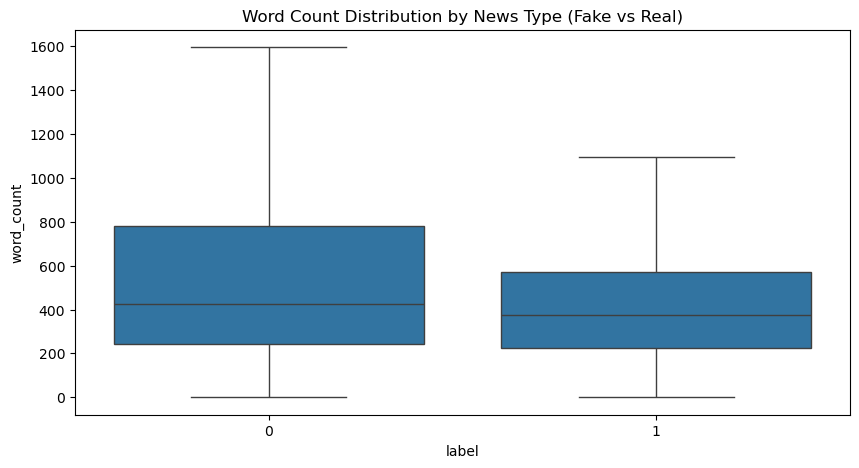

In [ ]:
# Add a column for word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Visualize word count distribution
plt.figure(figsize = (10,5))
sns.histplot(df['word_count'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the News Words count')

# Compare word count between real and fake news
plt.figure(figsize=(10,5))
sns.boxplot(x='label', y='word_count', showfliers=False, data=df)
plt.title('Word Count Distribution by News Type (Fake vs Real)')
plt.show()

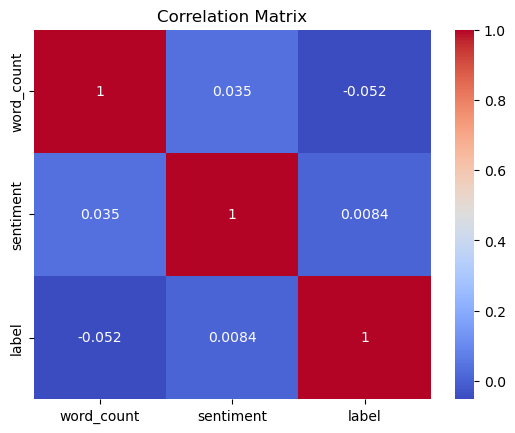

In [ ]:
# Correlation matrix
correlation = df[['word_count', 'sentiment', 'label']].corr()

# Visualize correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##   Visualization of Wordcloud
  

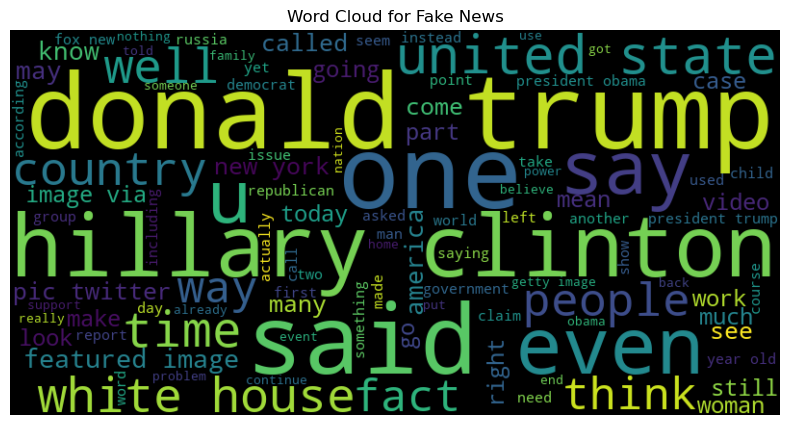

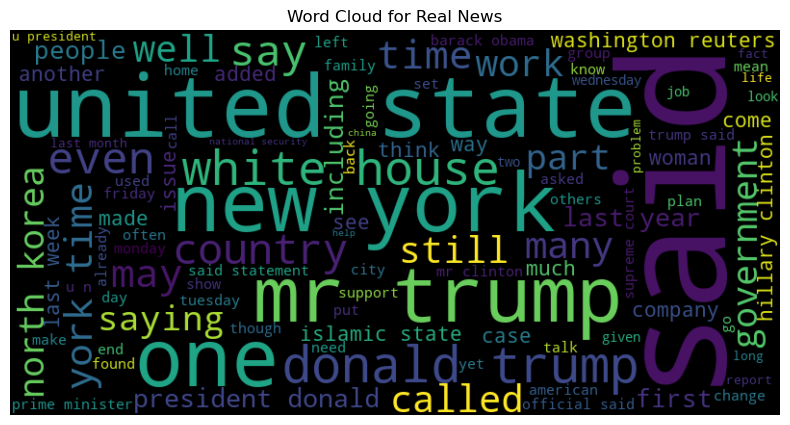

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for fake news
fake_news = df[df['label'] == 1]['content'].values
fake_news_text = ' '.join(fake_news)

wordcloud_fake = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(fake_news_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

# Generate word cloud for real news
real_news = df[df['label'] == 0]['content'].values
real_news_text = ' '.join(real_news)

wordcloud_real = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(real_news_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

/var/folders/88/8c2dgq99663bpg_bf9dqpb0r0000gn/T/ipykernel_29596/173830344.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='lexical_diversity', data=df, palette='Set1')


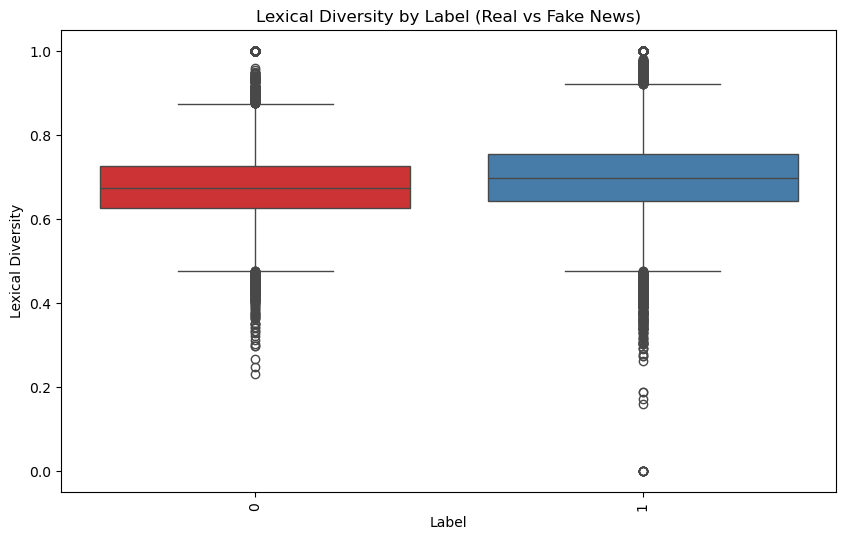

/var/folders/88/8c2dgq99663bpg_bf9dqpb0r0000gn/T/ipykernel_29596/173830344.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='label', y='lexical_diversity', data=df, size=3, jitter=True, palette='Set1')


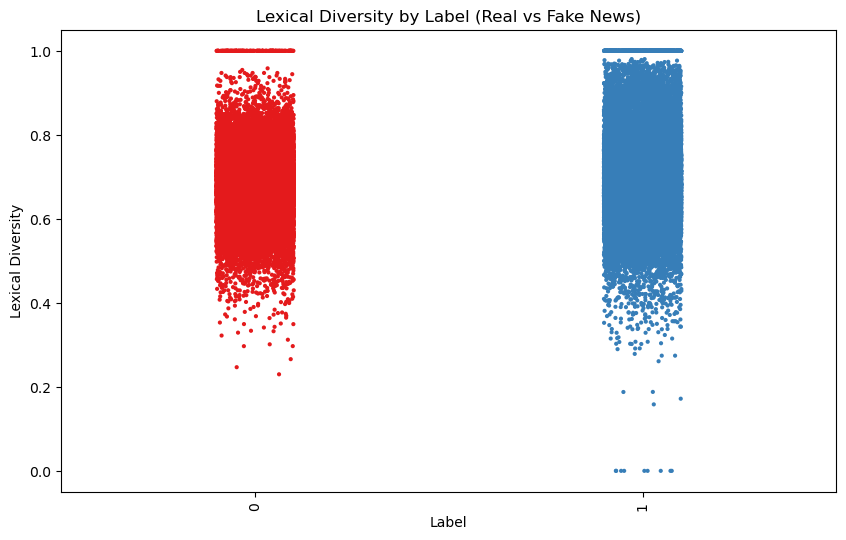

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute lexical diversity for each content piece
df['lexical_diversity'] = df['content'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='lexical_diversity', data=df, palette='Set1')
plt.title('Lexical Diversity by Label (Real vs Fake News)')
plt.xlabel('Label')
plt.ylabel('Lexical Diversity')
plt.xticks(rotation=90)
plt.show()

# Plot stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='label', y='lexical_diversity', data=df, size=3, jitter=True, palette='Set1')
plt.title('Lexical Diversity by Label (Real vs Fake News)')
plt.xlabel('Label')
plt.ylabel('Lexical Diversity')
plt.xticks(rotation=90)
plt.show()
